<a href="https://colab.research.google.com/github/Naima-chokri/workshop-node/blob/main/TP2_CNN_Pytorch_(to_complete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Import librairies

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchsummary import summary

* Download Multi-class Weather Dataset from kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pratik2901/multiclass-weather-dataset
!unzip 'multiclass-weather-dataset.zip'
!kaggle datasets download -d pratik2901/multiclass-weather-dataset
%cd "/content/Multi-class Weather Dataset"

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 97% 89.0M/91.4M [00:00<00:00, 127MB/s]
100% 91.4M/91.4M [00:00<00:00, 113MB/s]
Archive:  multiclass-weather-dataset.zip
  inflating: Multi-class Weather Dataset/Cloudy/cloudy1.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy10.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy100.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy101.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy102.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy103.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy104.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy105.jpg  
  inflating: Multi-class Weather Dataset/Cloudy/cloudy106.jpg  
  inflating: Multi-class Weather Dat

* Load all images from dataset


In [3]:
# Define transformations to be apply on the images
IMAGE_SIZE = 128
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ToTensor(),
    ]
)


dataset = torchvision.datasets.ImageFolder(
        root="/content/Multi-class Weather Dataset", # data_path is path to directory
        transform=transform
)

print(dataset)

Dataset ImageFolder
    Number of datapoints: 1125
    Root location: /content/Multi-class Weather Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


* Divide dataset into train (70%) and test (30%) subsets

In [4]:
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

print(len(train_dataset), "train samples and", len(test_dataset), "test samples")

787 train samples and 338 test samples


* Create DataLoader object for train and test subsets

In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 32,
                                           shuffle = True
)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 32,
                                          shuffle = False
)

for batch_num, (images, targets) in enumerate(train_loader):
  print("Batch image size", images.shape, "---- Batch label size", targets.shape)

Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Batch label size torch.Size([32])
Batch image size torch.Size([32, 3, 128, 128]) ---- Ba

* Plot images from train_loader

Feature batch shape: torch.Size([32, 3, 128, 128])
Labels batch shape: torch.Size([32])


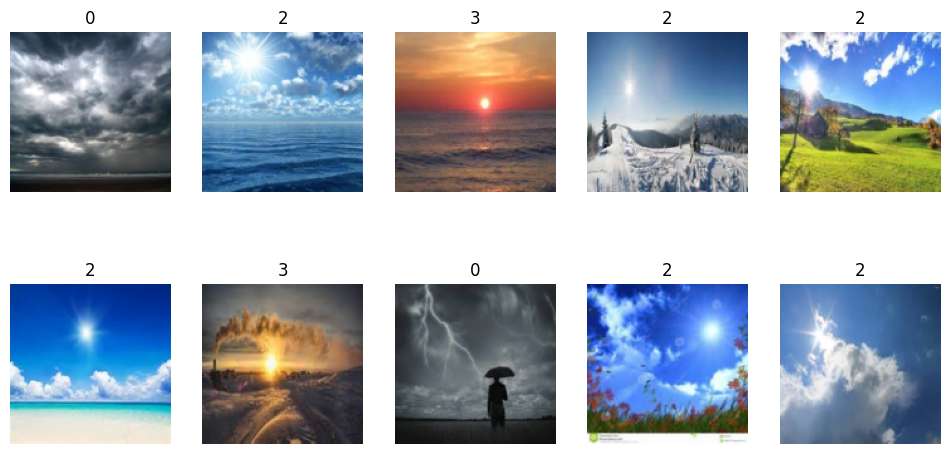

In [6]:
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
indx = 0
f, axarr = plt.subplots(2, 5, figsize=(12, 6))

for r in range(0, 2):
  for c in range(0, 5):
    img = train_features[indx].squeeze()
    label = train_labels[indx]
    axarr[r, c].imshow(transforms.ToPILImage()(img))
    axarr[r, c].set_title(str(label.item()))
    axarr[r, c].set_axis_off()
    indx+=1

* Implement CNN model:
  - input layer : (128, 128, 3)
  - Block 1 :
    * Conv2D : 32 filters, size (3, 3), stride = (1, 1)
    * Activation layer : ReLU
    * MaxPooling2D : pool size = (2, 2), stride = (2, 2)
  - Block 2 :
    * Conv2D : 64 filters, size = (3, 3), stride = (1, 1)
    * Activation layer : ReLU
    * MaxPooling2D : pool size = (2, 2), stride = (2, 2)
  - Flatten
  - Linear : 128 neurons
  - Activation : ReLU
  - Linear : 10 neurons
  - Activation layer : Softmax

In [22]:
# class CNN (nn.Module):

#   def __init__(self):

#     super().__init__()
#     self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3,3), stride = (1,1))
#     self.act1 = nn.ReLU()
#     self.pool11 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
#     self.conv2 = nn.Conv2d(in_channels =32 , out_channels = 64, kernel_size = (3,3), stride = (1,1))
#     self.flatten = nn.Flatten()
#     self.hidden1 = nn.Linear(in_features= 30*30*64, out_features=128)
#     self.out = nn.Linear(in_channels = 128 , out_features= 4)
#     self.softmax = nn.Softmax(dim = -1)



#   def forward (self, x):
#     x = self.conv1(x)
#     x = self.act1(x)
#     x = self.pool11(x)
#     x = self.conv2(x)
#     x = self.act1(x)
#     x = self.pool11(x)
#     x = self.flatten(x)
#     x = self.hidden1(x)
#     x = self.act1(x)
#     x = self.out(x)
#     x = self.softmax(x)

#     return x
class CNN (nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3,3), stride = (1,1))
    self.act1 = nn.ReLU()
    self.pool11 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    self.conv2 = nn.Conv2d(in_channels =32 , out_channels = 64, kernel_size = (3,3), stride = (1,1))
    self.flatten = nn.Flatten()
    self.hidden1 = nn.Linear(in_features= 30*30*64, out_features=128)
    self.out = nn.Linear(in_features = 128 , out_features= 4) # Corrected keyword argument
    self.softmax = nn.Softmax(dim = -1)



  def forward (self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool11(x)
    x = self.conv2(x)
    x = self.act1(x)
    x = self.pool11(x)
    x = self.flatten(x)
    x = self.hidden1(x)
    x = self.act1(x)
    x = self.out(x)
    x = self.softmax(x)

    return x

* Show cnn summary

In [23]:
# declare an instance of CNN
cnn=CNN()

if torch.cuda.is_available() == True:
  cnn.to("cuda")

summary(cnn, input_size = (3, 128, 128) )

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 126, 126]             896
              ReLU-2         [-1, 32, 126, 126]               0
         MaxPool2d-3           [-1, 32, 63, 63]               0
            Conv2d-4           [-1, 64, 61, 61]          18,496
              ReLU-5           [-1, 64, 61, 61]               0
         MaxPool2d-6           [-1, 64, 30, 30]               0
           Flatten-7                [-1, 57600]               0
            Linear-8                  [-1, 128]       7,372,928
              ReLU-9                  [-1, 128]               0
           Linear-10                    [-1, 4]             516
          Softmax-11                    [-1, 4]               0
Total params: 7,392,836
Trainable params: 7,392,836
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forw

* Define Loss function and optimizer

In [24]:
# Loss function
loss_function = nn.CrossEntropyLoss()

# optimizer Adam
optimizer = torch.optim.Adam (params = cnn.parameters() , lr =1e4 )

* Run the training Loop

In [25]:
epochs = 20

if torch.cuda.is_available == True:
  device = "cuda"
else:
  device = "cpu"


# declare an instance of CNN


# set the model to the train mode
cnn.to(device)
cnn.train()


for epoch in range(epochs):

    # define a list to store the losses of the different batches
    losses = []

    # iter over patches
    for batch_num, (images, targets) in enumerate(train_loader):

        # initialize the optimizer (Zero the gradients)
        optimizer.zero_grad()

        # extract images and targets from input_data (Get inputs)
        images = images.to(device)
        targets = targets.to(device)

        # Propagate the images and return the predicted output (Perform forward pass)
        output = cnn(images)

        # calculate the loss between actual and predicted outputs (Compute loss)
        loss = loss_function(output, targets)
        losses.append(loss.item())

        # Prpagate the gradient of the loss in reverse (Perform backward pass)
        loss.backward()

        # update the model parameters (Perform optimization)
        optimizer.step()

        #if batch_num % 4 == 0:
           # print('\tEpoch %d | Batch %d | Loss %6.2f' % (epoch, batch_num, loss.item()))
    print('Epoch %d -- Loss %6.4f' % (epoch, sum(losses)/len(losses)))

# Process is complete.
print('Training process has finished.')

Epoch 0 -- Loss 1.4697
Epoch 1 -- Loss 1.4724
Epoch 2 -- Loss 1.4715
Epoch 3 -- Loss 1.4732
Epoch 4 -- Loss 1.4715
Epoch 5 -- Loss 1.4724
Epoch 6 -- Loss 1.4698
Epoch 7 -- Loss 1.4689
Epoch 8 -- Loss 1.4698
Epoch 9 -- Loss 1.4715
Epoch 10 -- Loss 1.4681
Epoch 11 -- Loss 1.4732
Epoch 12 -- Loss 1.4706
Epoch 13 -- Loss 1.4706
Epoch 14 -- Loss 1.4706
Epoch 15 -- Loss 1.4706
Epoch 16 -- Loss 1.4724
Epoch 17 -- Loss 1.4715
Epoch 18 -- Loss 1.4681
Epoch 19 -- Loss 1.4681
Training process has finished.


* Save the trained model

In [26]:
torch.save(cnn, 'cnn_augment.pth')

* Load the model and run evaluation

In [27]:
if torch.cuda.is_available() == True:
  device = "cuda"
else:
  device = "cpu"

# load model saved in "mlp_model.pth"
cnn_model = torch.load('cnn_augment.pth')
cnn_model.to(device)

total_samples = len(test_loader.dataset)
correct_samples = 0
total_loss = 0

# set the model in evaluation mode
cnn_model.eval()

with torch.no_grad():

  # iter over batches
  for num_batch, (images, targets) in enumerate(test_loader):

    # extract images and targets from test_data (Get inputs)
    images = images.to(device)
    targets = targets.to(device)

    # calculate logits
    outputs = cnn_model(images)

    # calculate loss
    loss = loss_function(outputs, targets)
    total_loss += loss.item()

    # predict classes from outputs
    pred_targets = outputs.argmax(dim=1)

    # calculate correct predictions
    nb_correct = pred_targets.eq(targets).sum()
    correct_samples += nb_correct

avg_loss = total_loss / total_samples
val_accuracy = (correct_samples / total_samples)

print('\nAverage test loss: ' + '{:.4f}'.format(avg_loss) +
          '  val_accuracy:' + '{:.4f}'.format(val_accuracy) + '\n')


Average test loss: 0.0488  val_accuracy:0.2515

